## None not added

### Data Preprocess

In [174]:
import pandas as pd
train_df = pd.read_csv('Processed_Headings/seq_for_manual_labeled_removed_duplicate3.csv')
test_df = pd.read_csv('Processed_Headings/manual_labels_test - first_200.csv')
train_df

,Unnamed: 0,PMCID,PMID,sec-title,sec-norm
0,500,PMC11186413,38899045,"['Introduction', 'Materials and methods', 'Res...","['background', 'methods', 'results', 'conclusi..."
1,501,PMC11186417,38903923,"['Introduction', 'Materials and Methods', 'Res...","['background', 'methods', 'results', 'conclusi..."
2,502,PMC11186419,38903929,"['Introduction', 'Methods', 'Results', 'Discus...","['background', 'methods', 'results', 'conclusi..."
3,503,PMC11186422,38903925,"['Introduction', 'Materials and Methods', 'Res...","['background', 'methods', 'results', 'conclusi..."
4,504,PMC11186426,38903919,"['1. Introduction', '2. Data and Methods', '3....","['background', 'methods', 'results', 'conclusi..."
...,...,...,...,...,...
295,795,PMC11192634,38351139,"['Introduction', 'RNA modification and lncRNA'...","['background', 'background', 'background', 'co..."
296,796,PMC11192660,38864935,"['Introduction', 'Parkinson‚Äôs disease treatm...","['background', 'background', 'background', 'ba..."
297,797,PMC11192662,38581462,"['Introduction', 'Methods', 'Results', 'Discus...","['background', 'methods', 'results', 'conclusi..."
298,798,PMC11192683,38602530,"['Introduction', 'Methods', 'Results', 'Discus...","['background', 'methods', 'results', 'conclusi..."


In [175]:
test_df

,PMCID,PMID,sec-title,sec-norm
0,PMC10845090,37559243,"['INTRODUCTION', 'INFLAMMATION AND MAJOR DEPRE...","['background', nan, nan, 'conclusions', 'concl..."
1,PMC10845092,37644747,"['INTRODUCTION', 'MATERIALS AND METHODS', 'RES...","['background', 'methods', 'results', 'conclusi..."
2,PMC10845093,36815632,"['INTRODUCTION', 'GENERALIZED ANXIETY DISORDER...","['background', nan, nan, nan, nan, 'conclusion..."
3,PMC10850428,37553411,"['Introduction', 'Methods', 'Results', 'Discus...","['background', 'methods', 'results', 'conclusi..."
4,PMC1087202,15839744,"['History and Epidemiology', 'Causative Organi...","[nan, nan, nan, nan, nan, nan, nan, 'conclusio..."
...,...,...,...,...
95,PMC11141335,38827812,"['Introduction', 'Methods and analysis', 'Disc...","['background', 'methods', 'conclusions', 'back..."
96,PMC11142640,38819423,"['Introduction', 'Results', 'Discussion', 'Mat...","['background', 'results', 'conclusions', 'meth..."
97,PMC11143364,38822081,"['Introduction', 'Results', 'Discussion', 'Mat...","['background', 'results', 'conclusions', 'meth..."
98,PMC11144131,38822893,"['Introduction', 'Participants, materials & me...","['background', 'methods', 'results', 'conclusi..."


In [176]:
import ast
import numpy as np

# import numpy as np

def eval_with_nan(x):
    if isinstance(x, list):
        return [np.nan if (isinstance(i, float) and np.isnan(i)) else i for i in x]
    try:
        # 這邊直接 eval 而且給定 locals
        val = eval(x, {"nan": np.nan, "NaN": np.nan, "np": np})
        if isinstance(val, list):
            return [np.nan if (isinstance(i, float) and np.isnan(i)) else i for i in val]
        else:
            return val
    except Exception:
        return x  # 如果 eval 還失敗就原樣保留

# 用在你的 dataframe 上
# df_j['sec-norm'] = df_j['sec-norm'].apply(eval_with_nan)




In [177]:

train_df['sec-title'] = train_df['sec-title'].apply(ast.literal_eval)
test_df['sec-title'] = test_df['sec-title'].apply(ast.literal_eval)
train_df['sec-norm'] = train_df['sec-norm'].apply(eval_with_nan)
test_df['sec-norm'] = test_df['sec-norm'].apply(eval_with_nan)

In [178]:
train_df

,Unnamed: 0,PMCID,PMID,sec-title,sec-norm
0,500,PMC11186413,38899045,"[Introduction, Materials and methods, Results,...","[background, methods, results, conclusions, ba..."
1,501,PMC11186417,38903923,"[Introduction, Materials and Methods, Results,...","[background, methods, results, conclusions]"
2,502,PMC11186419,38903929,"[Introduction, Methods, Results, Discussion, C...","[background, methods, results, conclusions, co..."
3,503,PMC11186422,38903925,"[Introduction, Materials and Methods, Results,...","[background, methods, results, conclusions]"
4,504,PMC11186426,38903919,"[1. Introduction, 2. Data and Methods, 3. Resu...","[background, methods, results, conclusions, co..."
...,...,...,...,...,...
295,795,PMC11192634,38351139,"[Introduction, RNA modification and lncRNA, Fu...","[background, background, background, conclusions]"
296,796,PMC11192660,38864935,"[Introduction, Parkinson‚Äôs disease treatment...","[background, background, background, backgroun..."
297,797,PMC11192662,38581462,"[Introduction, Methods, Results, Discussion, C...","[background, methods, results, conclusions, co..."
298,798,PMC11192683,38602530,"[Introduction, Methods, Results, Discussion]","[background, methods, results, conclusions]"


In [179]:
test_df

,PMCID,PMID,sec-title,sec-norm
0,PMC10845090,37559243,"[INTRODUCTION, INFLAMMATION AND MAJOR DEPRESSI...","[background, nan, nan, conclusions, conclusion..."
1,PMC10845092,37644747,"[INTRODUCTION, MATERIALS AND METHODS, RESULTS,...","[background, methods, results, conclusions, co..."
2,PMC10845093,36815632,"[INTRODUCTION, GENERALIZED ANXIETY DISORDER (G...","[background, nan, nan, nan, nan, conclusions, ..."
3,PMC10850428,37553411,"[Introduction, Methods, Results, Discussion, C...","[background, methods, results, conclusions, co..."
4,PMC1087202,15839744,"[History and Epidemiology, Causative Organism ...","[nan, nan, nan, nan, nan, nan, nan, conclusion..."
...,...,...,...,...
95,PMC11141335,38827812,"[Introduction, Methods and analysis, Discussio...","[background, methods, conclusions, background,..."
96,PMC11142640,38819423,"[Introduction, Results, Discussion, Materials ...","[background, results, conclusions, methods, ba..."
97,PMC11143364,38822081,"[Introduction, Results, Discussion, Material a...","[background, results, conclusions, methods, ba..."
98,PMC11144131,38822893,"[Introduction, Participants, materials & metho...","[background, methods, results, conclusions, co..."


In [180]:
import pandas as pd

def convert_to_sep_format(row):
    titles = row["sec-title"]  # 取得標題列表
    labels = row["sec-norm"]   # 取得標籤列表

    inputs_with_sep = []
    labels_with_sep = []

    for i, title in enumerate(titles):
        inputs_with_sep.append(title)
        labels_with_sep.append("O")  # 一般 token 標記為 "O"
        
        # 在每個標題後面插入 [SEP]，對應標籤來自 sec-norm
        if i < len(labels):  # 確保標籤數量正確
            inputs_with_sep.append("[SEP]")
            if pd.isna(labels[i]):
                labels_with_sep.append('-100') ## none labeled
            else:
                labels_with_sep.append(labels[i])  # 讓 [SEP] 位置承擔標籤

    return pd.Series([inputs_with_sep, labels_with_sep])


# 對 DataFrame 進行轉換
train_df[["inputs_with_sep", "labels_with_sep"]] = train_df.apply(convert_to_sep_format, axis=1)
train_df = train_df[
    train_df['labels_with_sep'].apply(len) - train_df['labels_with_sep'].apply(lambda x: x.count('O')) > 0
]

test_df[["inputs_with_sep", "labels_with_sep"]] = test_df.apply(convert_to_sep_format, axis=1)
test_df = test_df[
    test_df['labels_with_sep'].apply(len) - test_df['labels_with_sep'].apply(lambda x: x.count('O')) > 0
]

In [181]:
train_df = train_df.drop(columns=['sec-title', 'sec-norm'])
train_df

,Unnamed: 0,PMCID,PMID,inputs_with_sep,labels_with_sep
0,500,PMC11186413,38899045,"[Introduction, [SEP], Materials and methods, [...","[O, background, O, methods, O, results, O, con..."
1,501,PMC11186417,38903923,"[Introduction, [SEP], Materials and Methods, [...","[O, background, O, methods, O, results, O, con..."
2,502,PMC11186419,38903929,"[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."
3,503,PMC11186422,38903925,"[Introduction, [SEP], Materials and Methods, [...","[O, background, O, methods, O, results, O, con..."
4,504,PMC11186426,38903919,"[1. Introduction, [SEP], 2. Data and Methods, ...","[O, background, O, methods, O, results, O, con..."
...,...,...,...,...,...
295,795,PMC11192634,38351139,"[Introduction, [SEP], RNA modification and lnc...","[O, background, O, background, O, background, ..."
296,796,PMC11192660,38864935,"[Introduction, [SEP], Parkinson‚Äôs disease tr...","[O, background, O, background, O, background, ..."
297,797,PMC11192662,38581462,"[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."
298,798,PMC11192683,38602530,"[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."


In [182]:
# train_df.to_csv('Processed_Headings/train_df_no_none.csv')

### model

In [183]:
from torch.utils.data import DataLoader
from transformers import BertTokenizerFast

from transformers import AutoTokenizer, AutoModel



tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")

MAX_LENGTH = 20  # 你希望的最大序列長度

def collate_fn(batch):
    input_ids, attention_masks, labels, word_lists, word_id_lists = zip(*batch)
    return (
        torch.stack(input_ids),
        torch.stack(attention_masks),
        torch.stack(labels),
        list(word_lists),
        list(word_id_lists)  # list of lists，不要 stack
    )



In [184]:
import torch
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict

# 載入 BERT Tokenizer
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 建立標籤映射表

label2id = {"O": 0, "objective": 1, "background": 2, "methods": 3, "results": 4, "conclusions": 5}
# label2id = defaultdict(int, label2id)
id2label = {v: k for k, v in label2id.items()}

class SectionDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=MAX_LENGTH):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        inputs_with_sep = ['[CLS]'] + row["inputs_with_sep"]  # 原始詞列表
        label_with_sep = [0] + row["labels_with_sep"]

        # Tokenize
        encoded = self.tokenizer(
            inputs_with_sep,
            is_split_into_words=True,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

        input_ids = encoded["input_ids"].squeeze(0)
        attention_mask = encoded["attention_mask"].squeeze(0)

        # 根據 word_ids 展開 label 給每個 token
        word_ids = encoded.word_ids(batch_index=0)
        labels_per_token = []

        for word_idx in word_ids:
            if word_idx is None:
                labels_per_token.append(0)  # special tokens
            else:
                label_name = label_with_sep[word_idx]
                label_id = label2id.get(label_name, 0)  # fallback 用 "O"
                labels_per_token.append(label_id)

        labels = torch.tensor(labels_per_token, dtype=torch.long)

        return input_ids, attention_mask, labels, inputs_with_sep, word_ids


from sklearn.model_selection import train_test_split

train_dataset = SectionDataset(train_df, tokenizer)
test_dataset = SectionDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True, collate_fn=collate_fn)



In [185]:
sample = train_dataset[0]
print(sample)

(tensor([    2,     2,  6935,     3,  4751,  1930,  2860,     3,  2274,     3,
         7248,     3,  2230,  6855, 12977,     3,  7809, 12977,     3,     3]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), tensor([0, 0, 0, 2, 0, 0, 0, 3, 0, 4, 0, 5, 0, 0, 0, 2, 0, 0, 2, 0]), ['[CLS]', 'Introduction', '[SEP]', 'Materials and methods', '[SEP]', 'Results', '[SEP]', 'Discussion', '[SEP]', 'Data availability statement', '[SEP]', 'Ethics statement', '[SEP]', 'Author contributions', '[SEP]', 'Conflict of interest', '[SEP]', 'Publisher‚Äôs note', '[SEP]', 'Supplementary material', '[SEP]'], [None, 0, 1, 2, 3, 3, 3, 4, 5, 6, 7, 8, 9, 9, 9, 10, 11, 11, 12, None])


In [186]:
# !pip uninstall TorchCRF
# !pip install transformers==4.30.2


In [187]:
import torch.nn as nn
from transformers import BertModel
from torchcrf import CRF

class BERT_CRF(nn.Module):
    def __init__(self, num_labels):
        super(BERT_CRF, self).__init__()
        self.bert = AutoModel.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")
        self.hidden_dim = self.bert.config.hidden_size
        self.fc = nn.Linear(self.hidden_dim, num_labels)  # 轉換為標籤 logits
        self.crf = CRF(num_labels, batch_first=True)  # CRF 層

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state  # (batch_size, seq_len, hidden_dim)
        emissions = self.fc(sequence_output)  # (batch_size, seq_len, num_labels)

        if labels is not None:
            loss = -self.crf(emissions, labels, mask=attention_mask.byte(), reduction="mean")
            return loss
        else:
            predictions = self.crf.decode(emissions, mask=attention_mask.byte())
            return predictions


In [188]:
import torch.optim as optim
from tqdm import tqdm

# 初始化模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERT_CRF(num_labels=len(label2id)).to(device)

optimizer = optim.AdamW(model.parameters(), lr=5e-5)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}'):
        input_ids, attention_mask, labels = [x.to(device) for x in batch[:3]]

        optimizer.zero_grad()
        loss = model(input_ids, attention_mask, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")


Epoch 1: 100%|██████████| 30/30 [00:01<00:00, 19.12it/s]


Epoch 1/100, Loss: 382.7920


Epoch 2: 100%|██████████| 30/30 [00:01<00:00, 19.06it/s]


Epoch 2/100, Loss: 112.9547


Epoch 3: 100%|██████████| 30/30 [00:01<00:00, 19.38it/s]


Epoch 3/100, Loss: 23.7907


Epoch 4: 100%|██████████| 30/30 [00:01<00:00, 19.16it/s]


Epoch 4/100, Loss: 10.3558


Epoch 5: 100%|██████████| 30/30 [00:01<00:00, 19.24it/s]


Epoch 5/100, Loss: 13.7167


Epoch 6: 100%|██████████| 30/30 [00:01<00:00, 19.23it/s]


Epoch 6/100, Loss: 10.7391


Epoch 7: 100%|██████████| 30/30 [00:01<00:00, 19.27it/s]


Epoch 7/100, Loss: 8.3028


Epoch 8: 100%|██████████| 30/30 [00:01<00:00, 19.15it/s]


Epoch 8/100, Loss: 5.1131


Epoch 9: 100%|██████████| 30/30 [00:01<00:00, 19.22it/s]


Epoch 9/100, Loss: 3.5316


Epoch 10: 100%|██████████| 30/30 [00:01<00:00, 19.22it/s]


Epoch 10/100, Loss: 3.8548


Epoch 11: 100%|██████████| 30/30 [00:01<00:00, 19.33it/s]


Epoch 11/100, Loss: 2.8081


Epoch 12: 100%|██████████| 30/30 [00:01<00:00, 19.08it/s]


Epoch 12/100, Loss: 1.6873


Epoch 13: 100%|██████████| 30/30 [00:01<00:00, 19.02it/s]


Epoch 13/100, Loss: 1.7523


Epoch 14: 100%|██████████| 30/30 [00:01<00:00, 19.47it/s]


Epoch 14/100, Loss: 1.7497


Epoch 15: 100%|██████████| 30/30 [00:01<00:00, 19.50it/s]


Epoch 15/100, Loss: 1.3582


Epoch 16: 100%|██████████| 30/30 [00:01<00:00, 19.50it/s]


Epoch 16/100, Loss: 0.9350


Epoch 17: 100%|██████████| 30/30 [00:01<00:00, 19.42it/s]


Epoch 17/100, Loss: 1.5377


Epoch 18: 100%|██████████| 30/30 [00:01<00:00, 19.51it/s]


Epoch 18/100, Loss: 1.3184


Epoch 19: 100%|██████████| 30/30 [00:01<00:00, 19.48it/s]


Epoch 19/100, Loss: 1.6203


Epoch 20: 100%|██████████| 30/30 [00:01<00:00, 19.40it/s]


Epoch 20/100, Loss: 1.7399


Epoch 21: 100%|██████████| 30/30 [00:01<00:00, 19.46it/s]


Epoch 21/100, Loss: 2.1568


Epoch 22: 100%|██████████| 30/30 [00:01<00:00, 19.38it/s]


Epoch 22/100, Loss: 1.7887


Epoch 23: 100%|██████████| 30/30 [00:01<00:00, 19.15it/s]


Epoch 23/100, Loss: 1.0745


Epoch 24: 100%|██████████| 30/30 [00:01<00:00, 19.18it/s]


Epoch 24/100, Loss: 0.8394


Epoch 25: 100%|██████████| 30/30 [00:01<00:00, 19.12it/s]


Epoch 25/100, Loss: 11.3364


Epoch 26: 100%|██████████| 30/30 [00:01<00:00, 19.28it/s]


Epoch 26/100, Loss: 8.7400


Epoch 27: 100%|██████████| 30/30 [00:01<00:00, 19.23it/s]


Epoch 27/100, Loss: 10.2867


Epoch 28: 100%|██████████| 30/30 [00:01<00:00, 19.18it/s]


Epoch 28/100, Loss: 5.5170


Epoch 29: 100%|██████████| 30/30 [00:01<00:00, 19.14it/s]


Epoch 29/100, Loss: 5.5289


Epoch 30: 100%|██████████| 30/30 [00:01<00:00, 19.06it/s]


Epoch 30/100, Loss: 3.3440


Epoch 31: 100%|██████████| 30/30 [00:01<00:00, 19.05it/s]


Epoch 31/100, Loss: 1.5231


Epoch 32: 100%|██████████| 30/30 [00:01<00:00, 19.05it/s]


Epoch 32/100, Loss: 1.9541


Epoch 33: 100%|██████████| 30/30 [00:01<00:00, 19.10it/s]


Epoch 33/100, Loss: 1.4165


Epoch 34: 100%|██████████| 30/30 [00:01<00:00, 19.52it/s]


Epoch 34/100, Loss: 1.2381


Epoch 35: 100%|██████████| 30/30 [00:01<00:00, 19.63it/s]


Epoch 35/100, Loss: 1.3912


Epoch 36: 100%|██████████| 30/30 [00:01<00:00, 19.58it/s]


Epoch 36/100, Loss: 1.0616


Epoch 37: 100%|██████████| 30/30 [00:01<00:00, 19.56it/s]


Epoch 37/100, Loss: 0.9056


Epoch 38: 100%|██████████| 30/30 [00:01<00:00, 19.63it/s]


Epoch 38/100, Loss: 0.4946


Epoch 39: 100%|██████████| 30/30 [00:01<00:00, 19.50it/s]


Epoch 39/100, Loss: 0.4855


Epoch 40: 100%|██████████| 30/30 [00:01<00:00, 19.55it/s]


Epoch 40/100, Loss: 1.5951


Epoch 41: 100%|██████████| 30/30 [00:01<00:00, 19.61it/s]


Epoch 41/100, Loss: 2.4050


Epoch 42: 100%|██████████| 30/30 [00:01<00:00, 19.54it/s]


Epoch 42/100, Loss: 3.6054


Epoch 43: 100%|██████████| 30/30 [00:01<00:00, 19.45it/s]


Epoch 43/100, Loss: 5.5429


Epoch 44: 100%|██████████| 30/30 [00:01<00:00, 19.59it/s]


Epoch 44/100, Loss: 4.3763


Epoch 45: 100%|██████████| 30/30 [00:01<00:00, 19.54it/s]


Epoch 45/100, Loss: 1.4658


Epoch 46: 100%|██████████| 30/30 [00:01<00:00, 19.50it/s]


Epoch 46/100, Loss: 1.0236


Epoch 47: 100%|██████████| 30/30 [00:01<00:00, 19.46it/s]


Epoch 47/100, Loss: 1.4133


Epoch 48: 100%|██████████| 30/30 [00:01<00:00, 19.24it/s]


Epoch 48/100, Loss: 2.1113


Epoch 49: 100%|██████████| 30/30 [00:01<00:00, 19.29it/s]


Epoch 49/100, Loss: 9.7309


Epoch 50: 100%|██████████| 30/30 [00:01<00:00, 19.27it/s]


Epoch 50/100, Loss: 23.0328


Epoch 51: 100%|██████████| 30/30 [00:01<00:00, 19.12it/s]


Epoch 51/100, Loss: 7.3774


Epoch 52: 100%|██████████| 30/30 [00:01<00:00, 19.08it/s]


Epoch 52/100, Loss: 1.9356


Epoch 53: 100%|██████████| 30/30 [00:01<00:00, 19.25it/s]


Epoch 53/100, Loss: 2.0399


Epoch 54: 100%|██████████| 30/30 [00:01<00:00, 19.29it/s]


Epoch 54/100, Loss: 3.4440


Epoch 55: 100%|██████████| 30/30 [00:01<00:00, 19.19it/s]


Epoch 55/100, Loss: 1.0691


Epoch 56: 100%|██████████| 30/30 [00:01<00:00, 19.11it/s]


Epoch 56/100, Loss: 0.8559


Epoch 57: 100%|██████████| 30/30 [00:01<00:00, 19.11it/s]


Epoch 57/100, Loss: 0.4725


Epoch 58: 100%|██████████| 30/30 [00:01<00:00, 19.12it/s]


Epoch 58/100, Loss: 0.4283


Epoch 59: 100%|██████████| 30/30 [00:01<00:00, 19.15it/s]


Epoch 59/100, Loss: 0.4215


Epoch 60: 100%|██████████| 30/30 [00:01<00:00, 19.19it/s]


Epoch 60/100, Loss: 1.4137


Epoch 61: 100%|██████████| 30/30 [00:01<00:00, 19.40it/s]


Epoch 61/100, Loss: 0.5668


Epoch 62: 100%|██████████| 30/30 [00:01<00:00, 19.43it/s]


Epoch 62/100, Loss: 1.5193


Epoch 63: 100%|██████████| 30/30 [00:01<00:00, 19.64it/s]


Epoch 63/100, Loss: 0.4264


Epoch 64: 100%|██████████| 30/30 [00:01<00:00, 19.61it/s]


Epoch 64/100, Loss: 0.6440


Epoch 65: 100%|██████████| 30/30 [00:01<00:00, 19.54it/s]


Epoch 65/100, Loss: 0.4497


Epoch 66: 100%|██████████| 30/30 [00:01<00:00, 19.53it/s]


Epoch 66/100, Loss: 0.4663


Epoch 67: 100%|██████████| 30/30 [00:01<00:00, 19.58it/s]


Epoch 67/100, Loss: 0.4177


Epoch 68: 100%|██████████| 30/30 [00:01<00:00, 19.64it/s]


Epoch 68/100, Loss: 1.6174


Epoch 69: 100%|██████████| 30/30 [00:01<00:00, 19.54it/s]


Epoch 69/100, Loss: 0.4956


Epoch 70: 100%|██████████| 30/30 [00:01<00:00, 19.45it/s]


Epoch 70/100, Loss: 0.3701


Epoch 71: 100%|██████████| 30/30 [00:01<00:00, 19.49it/s]


Epoch 71/100, Loss: 0.5119


Epoch 72: 100%|██████████| 30/30 [00:01<00:00, 19.43it/s]


Epoch 72/100, Loss: 0.3342


Epoch 73: 100%|██████████| 30/30 [00:01<00:00, 19.49it/s]


Epoch 73/100, Loss: 0.4666


Epoch 74: 100%|██████████| 30/30 [00:01<00:00, 19.50it/s]


Epoch 74/100, Loss: 0.5024


Epoch 75: 100%|██████████| 30/30 [00:01<00:00, 19.42it/s]


Epoch 75/100, Loss: 1.4582


Epoch 76: 100%|██████████| 30/30 [00:01<00:00, 19.42it/s]


Epoch 76/100, Loss: 3.4167


Epoch 77: 100%|██████████| 30/30 [00:01<00:00, 19.51it/s]


Epoch 77/100, Loss: 1.1266


Epoch 78: 100%|██████████| 30/30 [00:01<00:00, 17.59it/s]


Epoch 78/100, Loss: 1.6691


Epoch 79: 100%|██████████| 30/30 [00:01<00:00, 19.30it/s]


Epoch 79/100, Loss: 4.4998


Epoch 80: 100%|██████████| 30/30 [00:01<00:00, 19.34it/s]


Epoch 80/100, Loss: 2.2456


Epoch 81: 100%|██████████| 30/30 [00:01<00:00, 19.39it/s]


Epoch 81/100, Loss: 7.1653


Epoch 82: 100%|██████████| 30/30 [00:01<00:00, 19.29it/s]


Epoch 82/100, Loss: 11.0394


Epoch 83: 100%|██████████| 30/30 [00:01<00:00, 19.67it/s]


Epoch 83/100, Loss: 5.6170


Epoch 84: 100%|██████████| 30/30 [00:01<00:00, 19.60it/s]


Epoch 84/100, Loss: 3.1030


Epoch 85: 100%|██████████| 30/30 [00:01<00:00, 19.54it/s]


Epoch 85/100, Loss: 3.0331


Epoch 86: 100%|██████████| 30/30 [00:01<00:00, 19.23it/s]


Epoch 86/100, Loss: 3.1665


Epoch 87: 100%|██████████| 30/30 [00:01<00:00, 19.19it/s]


Epoch 87/100, Loss: 5.0817


Epoch 88: 100%|██████████| 30/30 [00:01<00:00, 19.16it/s]


Epoch 88/100, Loss: 1.5398


Epoch 89: 100%|██████████| 30/30 [00:01<00:00, 19.22it/s]


Epoch 89/100, Loss: 1.4379


Epoch 90: 100%|██████████| 30/30 [00:01<00:00, 19.11it/s]


Epoch 90/100, Loss: 1.2896


Epoch 91: 100%|██████████| 30/30 [00:01<00:00, 19.11it/s]


Epoch 91/100, Loss: 1.3268


Epoch 92: 100%|██████████| 30/30 [00:01<00:00, 19.24it/s]


Epoch 92/100, Loss: 1.3239


Epoch 93: 100%|██████████| 30/30 [00:01<00:00, 19.60it/s]


Epoch 93/100, Loss: 1.6115


Epoch 94: 100%|██████████| 30/30 [00:01<00:00, 19.65it/s]


Epoch 94/100, Loss: 1.1987


Epoch 95: 100%|██████████| 30/30 [00:01<00:00, 19.64it/s]


Epoch 95/100, Loss: 1.3191


Epoch 96: 100%|██████████| 30/30 [00:01<00:00, 19.61it/s]


Epoch 96/100, Loss: 1.1982


Epoch 97: 100%|██████████| 30/30 [00:01<00:00, 19.60it/s]


Epoch 97/100, Loss: 0.7550


Epoch 98: 100%|██████████| 30/30 [00:01<00:00, 19.59it/s]


Epoch 98/100, Loss: 0.7033


Epoch 99: 100%|██████████| 30/30 [00:01<00:00, 19.59it/s]


Epoch 99/100, Loss: 0.4497


Epoch 100: 100%|██████████| 30/30 [00:01<00:00, 19.50it/s]

Epoch 100/100, Loss: 0.3573


In [189]:
from sklearn.metrics import precision_recall_fscore_support

model.eval()
all_true_labels = []
all_pred_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch[:3]]
        word_lists, word_id_lists = batch[3], batch[4]
        # sep_none_type = [x.to(device) for x in batch[5]]
        predictions = model(input_ids, attention_mask)

        for i in range(len(word_lists)):
            word_list = word_lists[i]          # 原始詞 list
            word_ids = word_id_lists[i]        # token 對應的 word index
            preds = predictions[i]
            trues = labels[i]
            tokens = input_ids[i]

            for idx, word_idx in enumerate(word_ids):
                if word_idx is None:
                    continue
                word = word_list[word_idx]
                if word == "[SEP]" and trues[idx].item() != -1:
                    all_true_labels.append(id2label[trues[idx].item()])
                    all_pred_labels.append(id2label[preds[idx]])

print(f"True Labels: {len(all_true_labels)}, Pred Labels: {len(all_pred_labels)}")
print(f"Unique True Labels: {set(all_true_labels)}")
print(f"Unique Pred Labels: {set(all_pred_labels)}")

precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="macro"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


True Labels: 497, Pred Labels: 497
Unique True Labels: {'methods', 'results', 'background', 'conclusions', 'objective', 'O'}
Unique Pred Labels: {'methods', 'results', 'background', 'conclusions', 'O'}
Test Precision: 0.7882
Test Recall: 0.6554
Test F1 Score: 0.6498


/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [190]:
from sklearn.metrics import accuracy_score
precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="weighted"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print(f"Test Accuracy: {accuracy_score(all_true_labels, all_pred_labels)}")

Test Precision: 0.9349
Test Recall: 0.9356
Test F1 Score: 0.9174
Test Accuracy: 0.9356136820925554


/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [191]:
from sklearn.metrics import classification_report

print(classification_report(all_true_labels, all_pred_labels, digits=4))


              precision    recall  f1-score   support

           O     1.0000    0.0500    0.0952        20
  background     0.9375    0.9859    0.9611       213
 conclusions     0.9902    1.0000    0.9951       101
     methods     0.8936    0.9767    0.9333        86
   objective     0.0000    0.0000    0.0000         2
     results     0.9079    0.9200    0.9139        75

    accuracy                         0.9356       497
   macro avg     0.7882    0.6554    0.6498       497
weighted avg     0.9349    0.9356    0.9174       497



/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [192]:
from sklearn.metrics import accuracy_score
precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="micro"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print(f"Test Accuracy: {accuracy_score(all_true_labels, all_pred_labels)}")

Test Precision: 0.9356
Test Recall: 0.9356
Test F1 Score: 0.9356
Test Accuracy: 0.9356136820925554


In [193]:
torch.save(model.state_dict(), "models/bert_crf_pubMed_pretrained_300seed.pth")

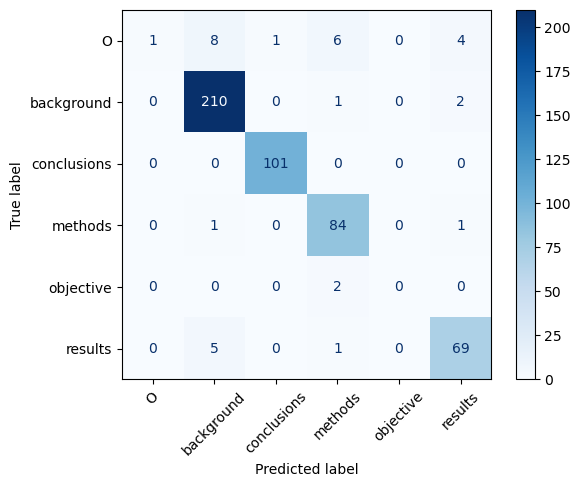

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = sorted(set(all_true_labels) | set(all_pred_labels))  # 統一所有可能的 label

cm = confusion_matrix(all_true_labels, all_pred_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45, cmap="Blues")

## MixText

### pre-process

In [ ]:
import pandas as pd

df = pd.read_csv('Processed_Headings/normalized_section_data 2.csv')
df.head()

In [ ]:
# df = df.dropna(subset=['sec-norm'])

In [ ]:
df_grouped = df.groupby(["PMCID", "PMID"]).agg(list)
df_grouped

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_grouped, test_size=0.1, random_state=49, shuffle=True)
len(train_df), len(test_df)

In [ ]:
test_pmc_list = [tup[0] for tup in test_df.index.tolist()]

In [ ]:
# df_test = df.dropna(subset=['sec-norm'])
df_test = df

In [ ]:
df_test = df_test[df_test['PMCID'].isin(test_pmc_list)]
df_test = df_test[(df_test['PMCID'] != 0) 
                    & (df_test['PMCID'].notna())
                    & (df_test['PMID'] != 0) 
                    & (df_test['PMID'].notna()) ]
df_test = df_test.drop_duplicates(subset=['PMCID', 'PMID', 'sec-title'])
df_test

In [ ]:
df_test = df_test.drop(columns=['sec-type'])
df_test

In [ ]:
test_df = df_test.groupby(["PMCID", "PMID"]).agg(list)
test_df

In [ ]:
test_df = test_df.reset_index()
test_df = test_df.drop_duplicates(subset=['PMCID'])

In [ ]:
test_df

In [ ]:
test_df[500:800].to_csv('seq_for_manual_labeled_removed_duplicate3.csv')

### get test from annotation

In [139]:
import pandas as pd
test_df = pd.read_csv('Processed_Headings/manual_labels_test - first_200.csv')
test_df

,PMCID,PMID,sec-title,sec-norm
0,PMC10845090,37559243,"['INTRODUCTION', 'INFLAMMATION AND MAJOR DEPRE...","['background', nan, nan, 'conclusions', 'concl..."
1,PMC10845092,37644747,"['INTRODUCTION', 'MATERIALS AND METHODS', 'RES...","['background', 'methods', 'results', 'conclusi..."
2,PMC10845093,36815632,"['INTRODUCTION', 'GENERALIZED ANXIETY DISORDER...","['background', nan, nan, nan, nan, 'conclusion..."
3,PMC10850428,37553411,"['Introduction', 'Methods', 'Results', 'Discus...","['background', 'methods', 'results', 'conclusi..."
4,PMC1087202,15839744,"['History and Epidemiology', 'Causative Organi...","[nan, nan, nan, nan, nan, nan, nan, 'conclusio..."
...,...,...,...,...
95,PMC11141335,38827812,"['Introduction', 'Methods and analysis', 'Disc...","['background', 'methods', 'conclusions', 'back..."
96,PMC11142640,38819423,"['Introduction', 'Results', 'Discussion', 'Mat...","['background', 'results', 'conclusions', 'meth..."
97,PMC11143364,38822081,"['Introduction', 'Results', 'Discussion', 'Mat...","['background', 'results', 'conclusions', 'meth..."
98,PMC11144131,38822893,"['Introduction', 'Participants, materials & me...","['background', 'methods', 'results', 'conclusi..."


In [140]:
import ast
import numpy as np

# import numpy as np

def eval_with_nan(x):
    if isinstance(x, list):
        return [np.nan if (isinstance(i, float) and np.isnan(i)) else i for i in x]
    try:
        # 這邊直接 eval 而且給定 locals
        val = eval(x, {"nan": np.nan, "NaN": np.nan, "np": np})
        if isinstance(val, list):
            return [np.nan if (isinstance(i, float) and np.isnan(i)) else i for i in val]
        else:
            return val
    except Exception:
        return x  # 如果 eval 還失敗就原樣保留

# 用在你的 dataframe 上
# df_j['sec-norm'] = df_j['sec-norm'].apply(eval_with_nan)




In [141]:
test_df['sec-title'] = test_df['sec-title'].apply(ast.literal_eval)
test_df['sec-norm'] = test_df['sec-norm'].apply(eval_with_nan)

In [142]:
test_df

,PMCID,PMID,sec-title,sec-norm
0,PMC10845090,37559243,"[INTRODUCTION, INFLAMMATION AND MAJOR DEPRESSI...","[background, nan, nan, conclusions, conclusion..."
1,PMC10845092,37644747,"[INTRODUCTION, MATERIALS AND METHODS, RESULTS,...","[background, methods, results, conclusions, co..."
2,PMC10845093,36815632,"[INTRODUCTION, GENERALIZED ANXIETY DISORDER (G...","[background, nan, nan, nan, nan, conclusions, ..."
3,PMC10850428,37553411,"[Introduction, Methods, Results, Discussion, C...","[background, methods, results, conclusions, co..."
4,PMC1087202,15839744,"[History and Epidemiology, Causative Organism ...","[nan, nan, nan, nan, nan, nan, nan, conclusion..."
...,...,...,...,...
95,PMC11141335,38827812,"[Introduction, Methods and analysis, Discussio...","[background, methods, conclusions, background,..."
96,PMC11142640,38819423,"[Introduction, Results, Discussion, Materials ...","[background, results, conclusions, methods, ba..."
97,PMC11143364,38822081,"[Introduction, Results, Discussion, Material a...","[background, results, conclusions, methods, ba..."
98,PMC11144131,38822893,"[Introduction, Participants, materials & metho...","[background, methods, results, conclusions, co..."


In [143]:
import pandas as pd

def convert_to_sep_format(row):
    titles = row["sec-title"]  # 取得標題列表
    labels = row["sec-norm"]   # 取得標籤列表

    inputs_with_sep = []
    labels_with_sep = []

    for i, title in enumerate(titles):
        inputs_with_sep.append(title)
        labels_with_sep.append("O")  # 一般 token 標記為 "O"
        
        # 在每個標題後面插入 [SEP]，對應標籤來自 sec-norm
        if i < len(labels):  # 確保標籤數量正確
            inputs_with_sep.append("[SEP]")
            if pd.isna(labels[i]):
                labels_with_sep.append('-100') ## none labeled
            else:
                labels_with_sep.append(labels[i])  # 讓 [SEP] 位置承擔標籤

    return pd.Series([inputs_with_sep, labels_with_sep])


# 對 DataFrame 進行轉換
# train_df[["inputs_with_sep", "labels_with_sep"]] = train_df.apply(convert_to_sep_format, axis=1)
test_df[["inputs_with_sep", "labels_with_sep"]] = test_df.apply(convert_to_sep_format, axis=1)


# train_df = train_df[
#     train_df['labels_with_sep'].apply(len) - train_df['labels_with_sep'].apply(lambda x: x.count('O')) > 0
# ]
test_df = test_df[
    test_df['labels_with_sep'].apply(len) - test_df['labels_with_sep'].apply(lambda x: x.count('O')) > 0
]
test_df

,PMCID,PMID,sec-title,sec-norm,inputs_with_sep,labels_with_sep
0,PMC10845090,37559243,"[INTRODUCTION, INFLAMMATION AND MAJOR DEPRESSI...","[background, nan, nan, conclusions, conclusion...","[INTRODUCTION, [SEP], INFLAMMATION AND MAJOR D...","[O, background, O, -100, O, -100, O, conclusio..."
1,PMC10845092,37644747,"[INTRODUCTION, MATERIALS AND METHODS, RESULTS,...","[background, methods, results, conclusions, co...","[INTRODUCTION, [SEP], MATERIALS AND METHODS, [...","[O, background, O, methods, O, results, O, con..."
2,PMC10845093,36815632,"[INTRODUCTION, GENERALIZED ANXIETY DISORDER (G...","[background, nan, nan, nan, nan, conclusions, ...","[INTRODUCTION, [SEP], GENERALIZED ANXIETY DISO...","[O, background, O, -100, O, -100, O, -100, O, ..."
3,PMC10850428,37553411,"[Introduction, Methods, Results, Discussion, C...","[background, methods, results, conclusions, co...","[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."
4,PMC1087202,15839744,"[History and Epidemiology, Causative Organism ...","[nan, nan, nan, nan, nan, nan, nan, conclusion...","[History and Epidemiology, [SEP], Causative Or...","[O, -100, O, -100, O, -100, O, -100, O, -100, ..."
...,...,...,...,...,...,...
95,PMC11141335,38827812,"[Introduction, Methods and analysis, Discussio...","[background, methods, conclusions, background,...","[Introduction, [SEP], Methods and analysis, [S...","[O, background, O, methods, O, conclusions, O,..."
96,PMC11142640,38819423,"[Introduction, Results, Discussion, Materials ...","[background, results, conclusions, methods, ba...","[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
97,PMC11143364,38822081,"[Introduction, Results, Discussion, Material a...","[background, results, conclusions, methods, ba...","[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
98,PMC11144131,38822893,"[Introduction, Participants, materials & metho...","[background, methods, results, conclusions, co...","[Introduction, [SEP], Participants, materials ...","[O, background, O, methods, O, results, O, con..."


In [144]:
# train_df = train_df.drop(columns=['sec-type', 'sec-title', 'sec-norm'])
test_df = test_df.drop(columns=[ 'sec-title', 'sec-norm'])

In [ ]:
# train_df

In [145]:
test_df

,PMCID,PMID,inputs_with_sep,labels_with_sep
0,PMC10845090,37559243,"[INTRODUCTION, [SEP], INFLAMMATION AND MAJOR D...","[O, background, O, -100, O, -100, O, conclusio..."
1,PMC10845092,37644747,"[INTRODUCTION, [SEP], MATERIALS AND METHODS, [...","[O, background, O, methods, O, results, O, con..."
2,PMC10845093,36815632,"[INTRODUCTION, [SEP], GENERALIZED ANXIETY DISO...","[O, background, O, -100, O, -100, O, -100, O, ..."
3,PMC10850428,37553411,"[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."
4,PMC1087202,15839744,"[History and Epidemiology, [SEP], Causative Or...","[O, -100, O, -100, O, -100, O, -100, O, -100, ..."
...,...,...,...,...
95,PMC11141335,38827812,"[Introduction, [SEP], Methods and analysis, [S...","[O, background, O, methods, O, conclusions, O,..."
96,PMC11142640,38819423,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
97,PMC11143364,38822081,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
98,PMC11144131,38822893,"[Introduction, [SEP], Participants, materials ...","[O, background, O, methods, O, results, O, con..."


In [146]:
# train_df.to_csv('Processed_Headings/train_df.csv')
test_df.to_csv('Processed_Headings/test_df.csv')

### from here

In [147]:
import pandas as pd
train_df = pd.read_csv('Processed_Headings/train_df.csv')
test_df = pd.read_csv('Processed_Headings/test_df.csv')

In [149]:
import ast

train_df['inputs_with_sep'] = train_df['inputs_with_sep'].apply(ast.literal_eval)
train_df['labels_with_sep'] = train_df['labels_with_sep'].apply(ast.literal_eval)

test_df['inputs_with_sep'] = test_df['inputs_with_sep'].apply(ast.literal_eval)
test_df['labels_with_sep'] = test_df['labels_with_sep'].apply(ast.literal_eval)

In [150]:
train_df

,PMCID,PMID,inputs_with_sep,labels_with_sep
0,PMC6254157,19384281,"[1. Introduction, [SEP], 2. Results and Discus...","[O, -100, O, -100, O, -100, O, -100]"
1,PMC4032680,24955383,"[1. Introduction, [SEP], 2. Model Hypotheses, ...","[O, -100, O, -100, O, -100, O, -100, O, -100, ..."
2,PMC6723279,31349708,"[1. Introduction, [SEP], 2. Materials and Meth...","[O, -100, O, -100, O, -100, O, -100, O, -100]"
3,PMC5290626,28159004,"[Introduction, [SEP], Large scale visualizatio...","[O, background, O, -100, O, -100, O, -100, O, ..."
4,PMC4172818,25193322,"[Background, [SEP], Methods, [SEP], Results, [...","[O, background, O, methods, O, results, O, con..."
...,...,...,...,...
1922647,PMC3786481,24155782,"[Introduction, [SEP], Conclusions, [SEP]]","[O, background, O, conclusions]"
1922648,PMC7926844,33671592,"[1. Introduction, [SEP], 2. Materials and Meth...","[O, -100, O, -100, O, -100, O, -100, O, -100]"
1922649,PMC11190545,0,"[Introduction, [SEP], Dataset description, [SE...","[O, background, O, -100, O, methods, O, -100, ..."
1922650,PMC3952259,0,"[Introduction, [SEP], Objectives, [SEP], Metho...","[O, background, O, objective, O, methods, O, r..."


In [151]:
test_df

,Unnamed: 0,PMCID,PMID,inputs_with_sep,labels_with_sep
0,0,PMC10845090,37559243,"[INTRODUCTION, [SEP], INFLAMMATION AND MAJOR D...","[O, background, O, -100, O, -100, O, conclusio..."
1,1,PMC10845092,37644747,"[INTRODUCTION, [SEP], MATERIALS AND METHODS, [...","[O, background, O, methods, O, results, O, con..."
2,2,PMC10845093,36815632,"[INTRODUCTION, [SEP], GENERALIZED ANXIETY DISO...","[O, background, O, -100, O, -100, O, -100, O, ..."
3,3,PMC10850428,37553411,"[Introduction, [SEP], Methods, [SEP], Results,...","[O, background, O, methods, O, results, O, con..."
4,4,PMC1087202,15839744,"[History and Epidemiology, [SEP], Causative Or...","[O, -100, O, -100, O, -100, O, -100, O, -100, ..."
...,...,...,...,...,...
95,95,PMC11141335,38827812,"[Introduction, [SEP], Methods and analysis, [S...","[O, background, O, methods, O, conclusions, O,..."
96,96,PMC11142640,38819423,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
97,97,PMC11143364,38822081,"[Introduction, [SEP], Results, [SEP], Discussi...","[O, background, O, results, O, conclusions, O,..."
98,98,PMC11144131,38822893,"[Introduction, [SEP], Participants, materials ...","[O, background, O, methods, O, results, O, con..."


In [117]:
# df_grouped

In [118]:
# type(df_grouped["labels_with_sep"][0])

In [152]:


import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ["TORCH_USE_CUDA_DSA"] = "1"

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [153]:


# torch_pad = pad_sequence(sep_none_type, batch_first=True, padding_value=-1)

In [154]:
from torch.utils.data import DataLoader
from transformers import BertTokenizerFast



tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

MAX_LENGTH = 20  # 你希望的最大序列長度

def collate_fn(batch):
    input_ids, attention_masks, labels, word_lists, word_id_lists, sep_none_type = zip(*batch)
    return (
        torch.stack(input_ids),
        torch.stack(attention_masks),
        torch.stack(labels),
        list(word_lists),
        list(word_id_lists),  # list of lists，不要 stack
        torch.stack(sep_none_type)
    )


In [155]:
import torch
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [156]:

from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict

# 載入 BERT Tokenizer
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 建立標籤映射表

label2id = {"-100": 0, "O": 0, "objective": 1, "background": 2, "methods": 3, "results": 4, "conclusions": 5}
# label2id = defaultdict(int, label2id)
id2label = {v: k for k, v in label2id.items()}
class SectionDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=MAX_LENGTH):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        inputs_with_sep = ['[CLS]'] + row["inputs_with_sep"]  # 原始詞列表
        label_with_sep = ['0'] + row["labels_with_sep"]
        sep_none_type = [1 if label == "-100" else 0 for label in label_with_sep]

        # Tokenize
        encoded = self.tokenizer(
            inputs_with_sep,
            is_split_into_words=True,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

        input_ids = encoded["input_ids"].squeeze(0)
        attention_mask = encoded["attention_mask"].squeeze(0)

        # 根據 word_ids 展開 label 給每個 token
        word_ids = encoded.word_ids(batch_index=0)
        labels_per_token = []
        sep_none_type_per_token = []

        for word_idx in word_ids:
            if word_idx is None:
                labels_per_token.append(0)  # special tokens
                sep_none_type_per_token.append(0)
            else:
                label_name = label_with_sep[word_idx]
                label_id = label2id.get(label_name, 0)  # fallback 用 "O"
                labels_per_token.append(label_id)
                sep_none_type_per_token.append(sep_none_type[word_idx])

        labels = torch.tensor(labels_per_token, dtype=torch.long)
        sep_none_type = torch.tensor(sep_none_type_per_token, dtype=torch.long)

        return input_ids, attention_mask, labels, inputs_with_sep, word_ids, sep_none_type






train_dataset = SectionDataset(train_df, tokenizer)
test_dataset = SectionDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True, collate_fn=collate_fn)



In [157]:
# num_tags = 6  # 你模型輸出的類別數，請替換成正確的值

# for i, batch in tqdm(enumerate(train_loader)):
#     input_ids, attention_mask, labels, word_lists, word_id_lists, sep_none_type = batch
    
#     # 把資料移到 CPU 來看清楚錯誤
#     labels_cpu = labels.cpu()

#     # 檢查 label 是否越界
#     if labels_cpu.min() < 0 or labels_cpu.max() >= num_tags:
#         print(f"🚨 Label Error in Batch {i}")
#         print("labels.shape:", labels.shape)
#         print("labels.min():", labels_cpu.min().item())
#         print("labels.max():", labels_cpu.max().item())
#         print("labels:", labels_cpu)
#         break  # 可以先中止程式跑，或改成 continue 繼續印出所有有問題的 batch

In [158]:
# !pip uninstall TorchCRF
# !pip install transformers==4.30.2


In [159]:
import os
os.environ["TORCH_USE_CUDA_DSA"] = "1"

In [160]:
import torch
import torch.nn as nn
from torchcrf import CRF
from transformers import BertModel

class MixTextCRF(CRF):
    def __init__(self, num_tags, batch_first=True):
        super().__init__(num_tags=num_tags, batch_first=batch_first)
        # 初始化 transition matrix
        nn.init.xavier_normal_(self.transitions)

    def forward(self, emissions, tags, psuedo_tags=None, mask=None, reduction='mean', none_type=None, threshold=0.85):
        
        if reduction == 'mix':
            # assert psuedo_tags is not None and none_type is not None

            # mixed_tags = torch.where(none_type.bool(), psuedo_tags, tags)

            # log-likelihood for each position
            log_p_true = self.token_level_log_prob(emissions, tags)           # shape: [B, L]
            log_p_pseudo = self.token_level_log_prob(emissions, psuedo_tags)  # shape: [B, L]
            none_type = torch.stack(none_type)

            with torch.no_grad():
                log_probs = torch.log_softmax(emissions, dim=-1)
                max_probs, _ = torch.max(log_probs, dim=-1)
                confidence_mask = (max_probs > threshold)
            # print(type(none_type))
            # 建立 mask
            mask = mask.float()
            true_mask = ((none_type == 0).float()) * mask
            pseudo_mask = ((none_type == 1).float()) * mask * confidence_mask.float()
            
            # lambda 可從 Beta 分布，也可以是 N_true / N_total
            lambda_val = torch.distributions.Beta(0.3, 0.3).sample().to(emissions.device)
            
            # 最後做 mix
            mixed_log_p = lambda_val * log_p_true * true_mask + (1 - lambda_val) * log_p_pseudo * pseudo_mask
            
            loss = - mixed_log_p.sum() / mask.sum()
            return loss

        else:
            log_likelihood = self._compute_log_likelihood(emissions, tags, mask)
            loss = -log_likelihood
            if reduction == 'mean':
                return loss.mean()
            elif reduction == 'sum':
                return loss.sum()
            return loss

    def token_level_log_prob(self, emissions, tags):
        # emissions: [B, L, C]  -- logits
        # tags: [B, L] -- gold or pseudo labels
        log_probs = torch.log_softmax(emissions, dim=-1)  # shape: [B, L, C]
        selected = log_probs.gather(2, tags.unsqueeze(-1)).squeeze(-1)  # shape: [B, L]
        return selected


In [ ]:

class BERT_CRF(nn.Module):
    def __init__(self, num_labels):
        super(BERT_CRF, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        if hasattr(self.bert.embeddings, 'token_type_ids'):
            del self.bert.embeddings.token_type_ids  # 移除有毒 buffer

        self.hidden_dim = self.bert.config.hidden_size
        self.fc = nn.Linear(self.hidden_dim, num_labels)
        self.crf = MixTextCRF(num_labels, batch_first=True)

    def forward(self, input_ids, attention_mask, labels=None, sep_none_type=None):
        
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state
        emissions = self.fc(sequence_output)
        # print(emissions.shape)
        # print(sep_none_type)
        
        if labels is not None:
            with torch.no_grad():
                decoded = self.crf.decode(emissions, mask=attention_mask.bool())
                psuedo_labels = []
                for i, seq in enumerate(decoded):
                    label_tensor = torch.zeros_like(labels[i])  # 全為 0
                    valid_mask = ((labels[i] != 0) | (sep_none_type[i] == 1)) & (attention_mask[i] == 1)
                    valid_indices = valid_mask.nonzero(as_tuple=True)[0]

                    # 按順序填入 decode 的值
                    for j, idx in enumerate(valid_indices):
                        if j < len(seq):
                            label_tensor[idx] = seq[idx]
            
                    psuedo_labels.append(label_tensor)
            
                psuedo_labels = torch.stack(psuedo_labels, dim=0)


        
            if sum(t.sum() for t in sep_none_type) > 0:
                loss = self.crf(
                    emissions,
                    labels,
                    psuedo_tags=psuedo_labels,
                    mask=attention_mask.bool(),
                    reduction="mix",
                    none_type=sep_none_type
                )
                return loss
            else:
                loss = -self.crf(
                    emissions,
                    labels,
                    mask=attention_mask.bool(),
                    reduction="mean"
                )
        else:
            return self.crf.decode(emissions, mask=attention_mask.bool())

In [162]:
import torch.optim as optim

from tqdm import tqdm

# 初始化模型

model = BERT_CRF(num_labels=6)
# 載入預訓練參數
state_dict = torch.load("models/bert_crf_pretrained_300seed.pth")
# 允許部分 miss（例如你有改一些架構）
model.load_state_dict(state_dict, strict=False)
model = model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=5e-5)

num_epochs = 2
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}'):
        
        input_ids, attention_mask, labels  = [x.to(device) for x in batch[:3]]
        sep_none_type = [x.to(device) for x in batch[5]]
        # 暫時移到 CPU，這樣錯誤訊息會完整顯示

        # print(sep_none_type)
        # print("attention_mask")
        # # print(attention_mask[0])
        # print(labels.shape)
        # print(labels.dtype)
        # print(labels.min(), labels.max()) 
        torch.cuda.synchronize() 
        
        
        optimizer.zero_grad()
        loss = model(input_ids, attention_mask, labels, sep_none_type)
        # loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")


Epoch 1: 100%|██████████| 19227/19227 [39:07<00:00,  8.19it/s]


Epoch 1/2, Loss: 8494.7290


Epoch 2: 100%|██████████| 19227/19227 [39:16<00:00,  8.16it/s] 

Epoch 2/2, Loss: 8418.1012


In [163]:
torch.save(model.state_dict(), "models/bert_crf_pretrained_Mixed_threshold_seed300.pth")

In [81]:
model = BERT_CRF(num_labels=6)
# 載入預訓練參數
state_dict = torch.load("models/bert_crf_pubMed_pretrained_300seed.pth")
# 允許部分 miss（例如你有改一些架構）
model.load_state_dict(state_dict, strict=False)
model = model.to(device)

In [83]:
from sklearn.metrics import precision_recall_fscore_support

model.eval()
all_true_labels = []
all_pred_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch[:3]]
        word_lists, word_id_lists = batch[3], batch[4]
        # sep_none_type = [x.to(device) for x in batch[5]]
        predictions = model(input_ids, attention_mask)

        for i in range(len(word_lists)):
            word_list = word_lists[i]          # 原始詞 list
            word_ids = word_id_lists[i]        # token 對應的 word index
            preds = predictions[i]
            trues = labels[i]
            tokens = input_ids[i]

            for idx, word_idx in enumerate(word_ids):
                if word_idx is None:
                    continue
                word = word_list[word_idx]
                if word == "[SEP]" and trues[idx].item() != -1:
                    all_true_labels.append(id2label[trues[idx].item()])
                    all_pred_labels.append(id2label[preds[idx]])

print(f"True Labels: {len(all_true_labels)}, Pred Labels: {len(all_pred_labels)}")
print(f"Unique True Labels: {set(all_true_labels)}")
print(f"Unique Pred Labels: {set(all_pred_labels)}")

precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="macro"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


True Labels: 490, Pred Labels: 490
Unique True Labels: {'methods', 'background', 'conclusions', 'results', 'objective', 'O'}
Unique Pred Labels: {'O', 'background'}
Test Precision: 0.0051
Test Recall: 0.1667
Test F1 Score: 0.0099


/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
from collections import Counter

conclusion_preds = [
    pred for true, pred in zip(all_true_labels, all_pred_labels)
    if true == "conclusions"
]

pred_counter = Counter(conclusion_preds)
total = sum(pred_counter.values())

for label, count in pred_counter.most_common():
    percent = count / total * 100
    print(f"{label}: {count} ({percent:.2f}%)")


O: 101 (100.00%)


In [85]:
from collections import Counter

conclusion_true = [
    true for true, pred in zip(all_true_labels, all_pred_labels)
    if pred == "conclusions"
]

pred_counter = Counter(conclusion_true)
total = sum(pred_counter.values())

for label, count in pred_counter.most_common():
    percent = count / total * 100
    print(f"{label}: {count} ({percent:.2f}%)")


In [86]:
from sklearn.metrics import accuracy_score
precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="weighted"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print(f"Test Accuracy: {accuracy_score(all_true_labels, all_pred_labels)}")

Test Precision: 0.0009
Test Recall: 0.0306
Test F1 Score: 0.0018
Test Accuracy: 0.030612244897959183


/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [87]:
from sklearn.metrics import classification_report

print(classification_report(all_true_labels, all_pred_labels, digits=4))


              precision    recall  f1-score   support

           O     0.0307    1.0000    0.0595        15
  background     0.0000    0.0000    0.0000       212
 conclusions     0.0000    0.0000    0.0000       101
     methods     0.0000    0.0000    0.0000        85
   objective     0.0000    0.0000    0.0000         2
     results     0.0000    0.0000    0.0000        75

    accuracy                         0.0306       490
   macro avg     0.0051    0.1667    0.0099       490
weighted avg     0.0009    0.0306    0.0018       490



/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/packages/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [88]:
from sklearn.metrics import accuracy_score
precision, recall, f1, _ = precision_recall_fscore_support(
    all_true_labels, all_pred_labels, average="micro"
)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print(f"Test Accuracy: {accuracy_score(all_true_labels, all_pred_labels)}")

Test Precision: 0.0306
Test Recall: 0.0306
Test F1 Score: 0.0306
Test Accuracy: 0.030612244897959183


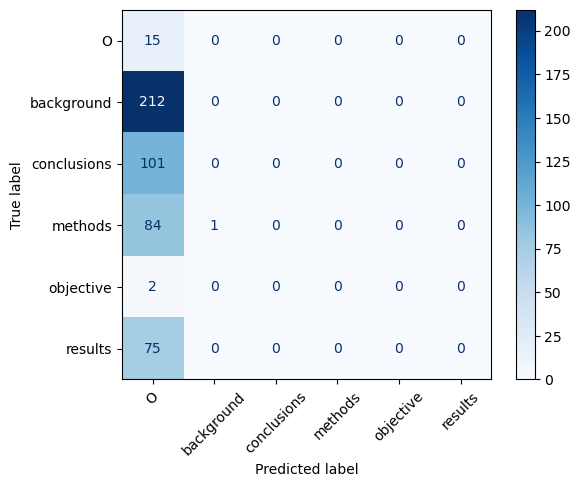

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = sorted(set(all_true_labels) | set(all_pred_labels))  # 統一所有可能的 label

cm = confusion_matrix(all_true_labels, all_pred_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45, cmap="Blues")